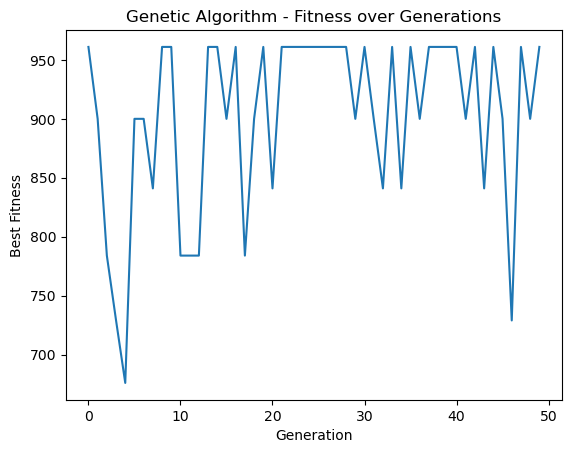

Individual: 27, Fitness: 729
Individual: 30, Fitness: 900
Individual: 30, Fitness: 900
Individual: 30, Fitness: 900
Individual: 15, Fitness: 225
Individual: 29, Fitness: 841
Individual: 27, Fitness: 729
Individual: 9, Fitness: 81
Individual: 15, Fitness: 225
Individual: 29, Fitness: 841


In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt

def fitness(x):
    return x**2

def create_individual():
    return random.randint(0, 31)

def crossover(parent1, parent2):
    crossover_point = random.randint(1, 4)
    mask = (1 << crossover_point) - 1
    offspring1 = (parent1 & mask) | (parent2 & ~mask)
    offspring2 = (parent2 & mask) | (parent1 & ~mask)
    return offspring1, offspring2

def mutate(individual):
    mutation_point = random.randint(0, 4)
    individual ^= (1 << mutation_point)
    return individual

def tournament_selection(population):
    selected = random.sample(population, 2)
    return max(selected, key=fitness)

def genetic_algorithm(generations=50, population_size=10):
    population = [create_individual() for _ in range(population_size)]
    
    best_fitness_over_time = []
    
    for generation in range(generations):
        population_fitness = [fitness(ind) for ind in population]
        
        best_fitness_over_time.append(max(population_fitness))
        
        new_population = []
        
        for _ in range(population_size // 2):
            parent1 = tournament_selection(population)
            parent2 = tournament_selection(population)
            offspring1, offspring2 = crossover(parent1, parent2)
            
            offspring1 = mutate(offspring1)
            offspring2 = mutate(offspring2)
            
            new_population.extend([offspring1, offspring2])
        
        population = new_population
    
    return best_fitness_over_time, population

best_fitness_over_time, final_population = genetic_algorithm()

plt.plot(best_fitness_over_time)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Genetic Algorithm - Fitness over Generations')
plt.show()

final_fitness = [fitness(ind) for ind in final_population]
for ind, fit in zip(final_population, final_fitness):
    print(f"Individual: {ind}, Fitness: {fit}")